In [4]:
from azure.storage.blob import BlockBlobService
import os

In [5]:
!mkdir geolife

mkdir: cannot create directory ‘geolife’: File exists


In [6]:
local_path=os.getcwd() + "/geolife"
blob_account_name = "mldsdatahack2019diag" # fill in your blob account name
blob_account_key = "JsauBssnY92CeD3MgI2SWhkQ16JioJCRWVW8NzKtcWckI+DaNNbCmpmMAVq27GD91mhgH+oHPx+QbIKUCow5gA=="  # fill in your blob account key
mycontainer = "datahackdata2019"       # fill in the container name 
myblobname = "000/Trajectory/20090705025307.csv"        # fill in the blob name 
mydatafile = "Output"        # fill in the output file name

In [7]:
import azure
from azure.storage.blob import BlockBlobService

blob_service = BlockBlobService(account_name=blob_account_name, account_key=blob_account_key)
containers = blob_service.list_containers()
blobs = [a for a in blob_service.list_blobs("datahackdata2019")]
csv_names = [a.name for a in blobs]

In [8]:
for name in csv_names:
    if name == "BCycleAustin.csv": continue
    blob_service.get_blob_to_path("datahackdata2019", name, os.path.join(local_path, name))

In [9]:
import pandas as pd

In [10]:
'''
    Function to collect desired user information. See examples of usage in next few cells.
    
    Input:
       - user_list  : list of desired user ids, should be 3 digit strings
            - e.g. '000', '001', ..., '180'
       - query      : string query to perform filtering on dataframe. 
            - Should be in the form ' [COLUMN] [QUALIFIER] [VALUE] '. 
            - Look into pandas.query for examples
       - date_range : list containing two valid DATETIMES
            - Format: [start, end]
            - If either is None, then no min/max date will be applied.
       - transportation: list containing what types of transportation
            - Format: [transportation1, transportation2, ...]
            - Default is None, which takes all types (even no transportation)
       - null_transport: boolean whether or not to include rows without transportation
            - e.g. if True, then keep all rows, o/w remove these blanks
    Output:
       - df : Pandas Dataframe with desired information
            
'''
def extract_users(PATH='./geolife',
                  user_list=[],
                  query = None,
                  date_range = [None,None],
                  transportation = [None],
                  null_transport = True):
    dfs = []
    
    start = date_range[0]
    end = date_range[1]
    
    check_transportation = transportation[0] != None
    
    for user in user_list:
        df = pd.read_csv(PATH+'/'+user+'.csv')
        df.fillna('', inplace=True)
        if start is None:
            start = df.DateTime.min()
        if end is None:
            end = df.DateTime.max()
        if query is not None:
            df = df.query(query)
        if not check_transportation:
            df = df[ (df.DateTime > start) & (df.DateTime < end) ]
        else:
            df = df[ (df.DateTime > start) & (df.DateTime < end) & (df['Transportation Mode'].isin(transportation))]
        
        if not null_transport:
            df = df[ df['Transportation Mode'] != '' ]
        dfs.append(df)
    return pd.concat(dfs,ignore_index=True)

In [11]:
df = extract_users(user_list=['{0:03d}'.format(x) for x in range(0,181)])
df

/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,Latitude,Longitude,Dummy,Altitude,Days Passed,User,Trajectory,DateTime,Transportation Mode
0,39.984683,116.318450,0,492.000000,39744.120255,0,0,2008-10-23 02:53:10,
1,39.984686,116.318417,0,492.000000,39744.120313,0,0,2008-10-23 02:53:15,
2,39.984688,116.318385,0,492.000000,39744.120370,0,0,2008-10-23 02:53:20,
3,39.984655,116.318263,0,492.000000,39744.120428,0,0,2008-10-23 02:53:25,
4,39.984611,116.318026,0,493.000000,39744.120486,0,0,2008-10-23 02:53:30,
5,39.984608,116.317761,0,493.000000,39744.120544,0,0,2008-10-23 02:53:35,
6,39.984563,116.317517,0,496.000000,39744.120602,0,0,2008-10-23 02:53:40,
7,39.984539,116.317294,0,500.000000,39744.120660,0,0,2008-10-23 02:53:45,
8,39.984606,116.317065,0,505.000000,39744.120718,0,0,2008-10-23 02:53:50,
9,39.984568,116.316911,0,510.000000,39744.120775,0,0,2008-10-23 02:53:55,


In [12]:
df = extract_users(user_list=['{0:03d}'.format(x) for x in range(0,11)], 
                   query = 'Latitude > 39.825041 and Latitude < 40 and Longitude > 116.211629 and Longitude < 116.512967')
df

/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,Latitude,Longitude,Dummy,Altitude,Days Passed,User,Trajectory,DateTime,Transportation Mode
0,39.984683,116.318450,0,492.0,39744.120255,0,0,2008-10-23 02:53:10,
1,39.984686,116.318417,0,492.0,39744.120313,0,0,2008-10-23 02:53:15,
2,39.984688,116.318385,0,492.0,39744.120370,0,0,2008-10-23 02:53:20,
3,39.984655,116.318263,0,492.0,39744.120428,0,0,2008-10-23 02:53:25,
4,39.984611,116.318026,0,493.0,39744.120486,0,0,2008-10-23 02:53:30,
5,39.984608,116.317761,0,493.0,39744.120544,0,0,2008-10-23 02:53:35,
6,39.984563,116.317517,0,496.0,39744.120602,0,0,2008-10-23 02:53:40,
7,39.984539,116.317294,0,500.0,39744.120660,0,0,2008-10-23 02:53:45,
8,39.984606,116.317065,0,505.0,39744.120718,0,0,2008-10-23 02:53:50,
9,39.984568,116.316911,0,510.0,39744.120775,0,0,2008-10-23 02:53:55,


In [14]:
# Install a mapping library
!pip install --upgrade pip
!pip install folium

Requirement already up-to-date: pip in /data/anaconda/envs/py35/lib/python3.5/site-packages (19.0.3)


In [15]:
# Library for visualizing on maps, for resources look here: 
#  https://python-visualization.github.io/folium/quickstart.html#Getting-Started
import folium

In [16]:
# Visualized!
# One trajectory for user 000
# df = extract_users(user_list=['000'],
#                    query = 'Trajectory == 0')
# df
m = folium.Map(
    location=[df['Latitude'].mean(),df['Longitude'].mean()],
    zoom_start=14,
    tiles='Stamen Terrain'
)

print(len(df))
for i in range(0,1000,100):
    folium.Marker([df['Latitude'][i],df['Longitude'][i]]).add_to(m)
m

1082536


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [19]:
positions = pd.DataFrame([df.Latitude,df.Longitude]).transpose()
positions

,Latitude,Longitude
0,39.984683,116.318450
1,39.984686,116.318417
2,39.984688,116.318385
3,39.984655,116.318263
4,39.984611,116.318026
5,39.984608,116.317761
6,39.984563,116.317517
7,39.984539,116.317294
8,39.984606,116.317065
9,39.984568,116.316911


In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

K = 100
kmeans_model = KMeans(n_clusters=K).fit(positions)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)


[[ 39.99942744 116.326546  ]
 [ 39.92660092 116.33705171]
 [ 39.91206597 116.40643526]
 [ 39.97571922 116.3362007 ]
 [ 39.90129864 116.2678666 ]
 [ 39.9736307  116.46183767]
 [ 39.96531117 116.30120007]
 [ 39.90653548 116.36772334]
 [ 39.98868546 116.41574573]
 [ 39.88171203 116.45910045]
 [ 39.86386007 116.39056695]
 [ 39.88370424 116.43535492]
 [ 39.98716818 116.36351155]
 [ 39.98353306 116.32141061]
 [ 39.86133443 116.24593642]
 [ 39.93331199 116.42357024]
 [ 39.95212596 116.31749525]
 [ 39.87849703 116.30507639]
 [ 39.95272578 116.34576662]
 [ 39.99161621 116.33204396]
 [ 39.95935357 116.27009273]
 [ 39.98483208 116.30938688]
 [ 39.90460017 116.21524573]
 [ 39.98017223 116.3403328 ]
 [ 39.90413225 116.35502097]
 [ 39.90857872 116.47213465]
 [ 39.8549056  116.31623639]
 [ 39.93599045 116.36516527]
 [ 39.90275695 116.42178813]
 [ 39.96739035 116.31567614]
 [ 39.89867992 116.37940413]
 [ 39.99460827 116.27213303]
 [ 39.85304271 116.27958368]
 [ 39.90829785 116.44537478]
 [ 39.96770291

In [21]:
for i in range(0,len(centers),1):
    folium.Marker([centers[i][0],centers[i][1]]).add_to(m)
m

In [22]:
def checkInRange(data):
    for i in range(0, len(centers)):
        latitude = centers[i][0]
        longitude = centers[i][1]
        if((latitude - data['Latitude'])**2 + (longitude - data['Longitude'])**2 < 0.0000001):
            return True, latitude, longitude
    return False, 0, 0

In [23]:
one_person_data = extract_users(user_list=['000'])
print(len(one_person_data))
col_names =  ['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']
route  = pd.DataFrame()

start_x = 0
start_y = 0
start = True
for i in range(0,len(one_person_data)):
    status, latitude, longitude = checkInRange(one_person_data.iloc[i])
    if(status == True):
        if(start == True):
            start_x = latitude
            start_y = longitude
            start = False
        else:
            route = route.append({'start_latitude' : start_x , 'start_longitude' : start_y, 'end_latitude' : latitude, 'end_longitude' : longitude} , ignore_index=True)
            start_x = latitude
            start_y = longitude
route
              

173868


,end_latitude,end_longitude,start_latitude,start_longitude
0,39.999427,116.326546,39.972326,116.327902
1,39.999427,116.326546,39.999427,116.326546
2,39.981653,116.327647,39.999427,116.326546
3,39.981653,116.327647,39.981653,116.327647
4,39.981653,116.327647,39.981653,116.327647
5,39.981653,116.327647,39.981653,116.327647
6,39.981653,116.327647,39.981653,116.327647
7,39.981653,116.327647,39.981653,116.327647
8,39.991453,116.327162,39.981653,116.327647
9,39.991453,116.327162,39.991453,116.327162


In [39]:
reasonable_route = pd.DataFrame()
for i in range(len(route)):
    start_lat = route['start_latitude'][i]
    start_lon = route['start_longitude'][i]
    end_lat = route['end_latitude'][i]
    end_lon = route['end_longitude'][i]
    if((((end_lat - start_lat)**2 + (end_lon - start_lon)**2)**(0.5)) < 0.034760358172402556):
        reasonable_route = reasonable_route.append({'start_latitude' : start_lat , 'start_longitude' : start_lon, 'end_latitude' : end_lat, 'end_longitude' : end_lon} , ignore_index=True)
reasonable_route

,end_latitude,end_longitude,start_latitude,start_longitude
0,39.999427,116.326546,39.972326,116.327902
1,39.999427,116.326546,39.999427,116.326546
2,39.981653,116.327647,39.999427,116.326546
3,39.981653,116.327647,39.981653,116.327647
4,39.981653,116.327647,39.981653,116.327647
5,39.981653,116.327647,39.981653,116.327647
6,39.981653,116.327647,39.981653,116.327647
7,39.981653,116.327647,39.981653,116.327647
8,39.991453,116.327162,39.981653,116.327647
9,39.991453,116.327162,39.991453,116.327162


In [40]:
import folium
m = folium.Map(
    location=[reasonable_route['start_latitude'].mean(),reasonable_route['start_longitude'].mean()],
    zoom_start=14,
    tiles='Stamen Terrain'
)

for i in range(len(reasonable_route)):
    start_lat = reasonable_route['start_latitude'][i]
    start_lon = reasonable_route['start_longitude'][i]
    end_lat = reasonable_route['end_latitude'][i]
    end_lon = reasonable_route['end_longitude'][i]
    folium.PolyLine([(start_lat, start_lon),
                    (end_lat,end_lon)], color="red", weight=2.5).add_to(m)
m

In [41]:
from azure.storage.blob import BlockBlobService
import os

In [43]:
local_path=os.getcwd() + "/bcycle" # Where the data will be stored.
blob_account_name = "mldsdatahack2019diag" # Don't edit!
blob_account_key = "JsauBssnY92CeD3MgI2SWhkQ16JioJCRWVW8NzKtcWckI+DaNNbCmpmMAVq27GD91mhgH+oHPx+QbIKUCow5gA=="  # Don't edit!

mycontainer = "datahackdata2019"       # Don't edit!

In [44]:
import azure
from azure.storage.blob import BlockBlobService

# Create a client to get data
blob_service = BlockBlobService(account_name=blob_account_name, account_key=blob_account_key)
# Get the data
blob_service.get_blob_to_path("datahackdata2019", "BCycleAustin.csv", os.path.join(local_path, "BCycleAustin.csv"))

In [45]:
# Yo should see BCycleAustin.csv
!ls bcycle

BCycleAustin.csv


In [46]:
# Read in data
df = pd.read_csv('bcycle/BCycleAustin.csv')

In [47]:
df1=df.loc[df['Trip Duration Minutes'] >= 1]
df1


,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude
0,9900285854,Annual (San Antonio B-cycle),207.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,2014-10-26 13:12:00,30.27041,-97.75046,30.25579,-97.73982
1,9900288020,24-Hour Kiosk (Austin B-cycle),190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,12,2014-10-30 19:12:00,30.27041,-97.75046,30.25579,-97.73982
2,9900289011,Local365,190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-01 19:12:27,30.27041,-97.75046,30.25579,-97.73982
3,9900292552,Walk Up,354.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,14,2015-10-04 13:12:41,30.27041,-97.75046,30.25579,-97.73982
4,9900293709,Local365,20.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-04 13:12:56,30.27041,-97.75046,30.25579,-97.73982
5,9900294584,Local365,133.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,10,2015-10-05 17:12:13,30.27041,-97.75046,30.25579,-97.73982
6,9900295170,Local365,134.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-06 18:12:47,30.27041,-97.75046,30.25579,-97.73982
7,9900296123,Local365,232.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-08 17:12:56,30.27041,-97.75046,30.25579,-97.73982
8,9900297717,Local365,439.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-09 22:12:48,30.27041,-97.75046,30.25579,-97.73982
9,9900302356,Local365,95.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-12 17:12:06,30.27041,-97.75046,30.25579,-97.73982


In [48]:
mean1=df1.loc[:,'Trip Duration Minutes'].mean()
mean1

27.37286573217801

In [49]:
mean0=df.loc[:,'Trip Duration Minutes'].mean()
mean0


26.87167890584026

In [50]:
dfd=df.loc[df['Trip Duration Minutes']>10000]
dfd

,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude
730545,10100370,Walk Up,127.0,2537.0,West & 6th St.,2504.0,South Congress & Elizabeth,10981,2016-05-22 06:27:11,30.27041,-97.75046,30.24891,-97.75019


In [51]:
q = df["Trip Duration Minutes"].quantile(0.99)
q

219.0

In [52]:
# calculate summary statistics
data_mean, data_std = df.loc[:,'Trip Duration Minutes'].mean(), df.loc[:,'Trip Duration Minutes'].std()
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print("cut_off:")
print(cut_off)
print("mean time:")
print(data_mean)
print("upper edge:")
print(upper)

cut_off:
226.60907104105638
mean time:
26.87167890584026
upper edge:
253.48074994689665


In [53]:
dfclean = df.loc[df['Trip Duration Minutes']<cut_off] 
dfclean

,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude
0,9900285854,Annual (San Antonio B-cycle),207.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,2014-10-26 13:12:00,30.27041,-97.75046,30.25579,-97.73982
1,9900288020,24-Hour Kiosk (Austin B-cycle),190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,12,2014-10-30 19:12:00,30.27041,-97.75046,30.25579,-97.73982
2,9900289011,Local365,190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-01 19:12:27,30.27041,-97.75046,30.25579,-97.73982
3,9900292552,Walk Up,354.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,14,2015-10-04 13:12:41,30.27041,-97.75046,30.25579,-97.73982
4,9900293709,Local365,20.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-04 13:12:56,30.27041,-97.75046,30.25579,-97.73982
5,9900294584,Local365,133.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,10,2015-10-05 17:12:13,30.27041,-97.75046,30.25579,-97.73982
6,9900295170,Local365,134.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-06 18:12:47,30.27041,-97.75046,30.25579,-97.73982
7,9900296123,Local365,232.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-08 17:12:56,30.27041,-97.75046,30.25579,-97.73982
8,9900297717,Local365,439.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-09 22:12:48,30.27041,-97.75046,30.25579,-97.73982
9,9900302356,Local365,95.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-12 17:12:06,30.27041,-97.75046,30.25579,-97.73982


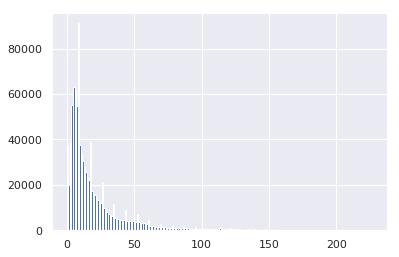

In [54]:
dfclean['Trip Duration Minutes'].hist(bins = 200)

In [55]:

dfclean['distance']=((df['Return Longitude']-df['Checkout Longitude'])**2+(df['Return Latitude']-df['Checkout Latitude'])**2)**(0.5)
dfclean

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude,distance
0,9900285854,Annual (San Antonio B-cycle),207.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,2014-10-26 13:12:00,30.27041,-97.75046,30.25579,-97.73982,0.018082
1,9900288020,24-Hour Kiosk (Austin B-cycle),190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,12,2014-10-30 19:12:00,30.27041,-97.75046,30.25579,-97.73982,0.018082
2,9900289011,Local365,190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-01 19:12:27,30.27041,-97.75046,30.25579,-97.73982,0.018082
3,9900292552,Walk Up,354.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,14,2015-10-04 13:12:41,30.27041,-97.75046,30.25579,-97.73982,0.018082
4,9900293709,Local365,20.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-04 13:12:56,30.27041,-97.75046,30.25579,-97.73982,0.018082
5,9900294584,Local365,133.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,10,2015-10-05 17:12:13,30.27041,-97.75046,30.25579,-97.73982,0.018082
6,9900295170,Local365,134.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-06 18:12:47,30.27041,-97.75046,30.25579,-97.73982,0.018082
7,9900296123,Local365,232.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-08 17:12:56,30.27041,-97.75046,30.25579,-97.73982,0.018082
8,9900297717,Local365,439.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-09 22:12:48,30.27041,-97.75046,30.25579,-97.73982,0.018082
9,9900302356,Local365,95.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-12 17:12:06,30.27041,-97.75046,30.25579,-97.73982,0.018082


In [56]:
# calculate summary statistics
data_mean1, data_std1 = dfclean.loc[:,'distance'].mean(), dfclean.loc[:,'distance'].std()
# identify outliers
cut_off1 = data_std1 * 3
lowerd, upperd = data_mean1 - cut_off1, data_mean1 + cut_off1

print("cut_off:")
print(cut_off1)
print()
print("mean distance:")
print(data_mean1)
print()
print("upper edge:")
print(upperd)


cut_off:
0.024521842095650753

mean distance:
0.010483896929640284

upper edge:
0.03500573902529104


In [57]:
dfclean['dates'] = pd.to_datetime(dfclean['Checkout DateTime'])
dfclean['weekday'] = dfclean['dates'].dt.day_name()
dfclean['hour'] = dfclean['dates'].dt.hour
dfclean

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude,distance,dates,weekday,hour
0,9900285854,Annual (San Antonio B-cycle),207.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,2014-10-26 13:12:00,30.27041,-97.75046,30.25579,-97.73982,0.018082,2014-10-26 13:12:00,Sunday,13
1,9900288020,24-Hour Kiosk (Austin B-cycle),190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,12,2014-10-30 19:12:00,30.27041,-97.75046,30.25579,-97.73982,0.018082,2014-10-30 19:12:00,Thursday,19
2,9900289011,Local365,190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-01 19:12:27,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-01 19:12:27,Thursday,19
3,9900292552,Walk Up,354.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,14,2015-10-04 13:12:41,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-04 13:12:41,Sunday,13
4,9900293709,Local365,20.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-04 13:12:56,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-04 13:12:56,Sunday,13
5,9900294584,Local365,133.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,10,2015-10-05 17:12:13,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-05 17:12:13,Monday,17
6,9900295170,Local365,134.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-06 18:12:47,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-06 18:12:47,Tuesday,18
7,9900296123,Local365,232.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-08 17:12:56,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-08 17:12:56,Thursday,17
8,9900297717,Local365,439.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-09 22:12:48,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-09 22:12:48,Friday,22
9,9900302356,Local365,95.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-12 17:12:06,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-12 17:12:06,Monday,17


In [59]:
y=dfclean['Trip Duration Minutes']
x = dfclean.loc[:,['weekday','hour','distance']]
# cat_names = {1:'Monday', 2:'Tuesday', 3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
# for elem in x_train['weekday'].unique():
#     x_train=[cat_names[elem]] = x_train['weekday'] == elem

# x['weekday']=x['weekday'].dt.dayofweek
# print(x)
# print(y)
x=pd.get_dummies(data=x, columns=['weekday'])
x


,hour,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,13,0.018082,0,0,0,1,0,0,0
1,19,0.018082,0,0,0,0,1,0,0
2,19,0.018082,0,0,0,0,1,0,0
3,13,0.018082,0,0,0,1,0,0,0
4,13,0.018082,0,0,0,1,0,0,0
5,17,0.018082,0,1,0,0,0,0,0
6,18,0.018082,0,0,0,0,0,1,0
7,17,0.018082,0,0,0,0,1,0,0
8,22,0.018082,1,0,0,0,0,0,0
9,17,0.018082,0,1,0,0,0,0,0


In [60]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_train.head()


,hour,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
517704,13,0.011589,0,0,0,0,1,0,0
110376,13,0.012890,0,0,1,0,0,0,0
357279,18,0.000000,0,0,0,0,0,0,1
897434,15,0.009483,0,0,0,0,0,1,0
806517,10,0.009050,0,1,0,0,0,0,0


In [61]:
xgdmat=xgb.DMatrix(X_train,y_train)
our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
final_gb=xgb.train(our_params,xgdmat)
tesdmat=xgb.DMatrix(X_test)
y_pred=final_gb.predict(tesdmat)
print(y_pred)

[21:47:58] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:47:58] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:47:58] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:47:58] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:47:58] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:47:58] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:47:58] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:47:58] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3


In [62]:
from sklearn.metrics import mean_squared_error
import math
testScore=math.sqrt(mean_squared_error(y_test.values,y_pred))
print(testScore)

27.49466467778492


In [63]:
def checkInRange(data):
    for i in range(0, len(centers)):
        latitude = centers[i][0]
        longitude = centers[i][1]
        if((latitude - data['Latitude'])**2 + (longitude - data['Longitude'])**2 < 0.0000001):
            return True, latitude, longitude
    return False, 0, 0

In [72]:
one_person_data = extract_users(user_list=['000'])
print(len(one_person_data))
col_names =  ['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']
route  = pd.DataFrame()
final = pd.DataFrame()
start_x = 0
start_y = 0
start = True
for i in range(0,len(one_person_data)):
    status, latitude, longitude = checkInRange(one_person_data.iloc[i])
    if(status == True):
        if(start == True):
            start_x = latitude
            start_y = longitude
            start = False
        else:
            route = route.append({'start_latitude' : start_x , 'start_longitude' : start_y, 'end_latitude' : latitude, 'end_longitude' : longitude} , ignore_index=True)
            final = final.append({'dates' : (one_person_data.iloc[i]['DateTime']), 'distance' : ((latitude-start_x)**2+(longitude-start_y)**2)**(0.5)}, ignore_index=True)
            start_x = latitude
            start_y = longitude
            
final
              

173868


AttributeError: Can only use .dt accessor with datetimelike values

In [75]:

final['weekday'] = pd.to_datetime(final['dates']).dt.day_name()
final['hour'] = pd.to_datetime(final['dates']).dt.hour
x1 = final.loc[:,['weekday','hour','distance']]
x1 = pd.get_dummies(data=x1, columns=['weekday'])
x1


,hour,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,23,0.027135,0,1,0,0,0,0,0
1,23,0.000000,0,1,0,0,0,0,0
2,3,0.017809,0,1,0,0,0,0,0
3,3,0.000000,0,1,0,0,0,0,0
4,3,0.000000,0,1,0,0,0,0,0
5,3,0.000000,0,1,0,0,0,0,0
6,3,0.000000,0,1,0,0,0,0,0
7,3,0.000000,0,1,0,0,0,0,0
8,3,0.009812,0,1,0,0,0,0,0
9,3,0.000000,0,1,0,0,0,0,0


In [86]:
tesdmat=xgb.DMatrix(x1)
y_pred=final_gb.predict(tesdmat)

print(pd.DataFrame({'time' : y_pred}))

           time
0     19.481985
1     17.120893
2     14.002227
3     16.250511
4     16.250511
5     16.250511
6     16.250511
7     16.250511
8      8.934495
9     16.250511
10    16.250511
11    16.250511
12    16.250511
13    16.250511
14    16.250511
15    16.250511
16    16.250511
17    16.250511
18    16.250511
19    16.250511
20    16.250511
21    16.250511
22    16.250511
23    16.250511
24    16.250511
25    16.250511
26    16.250511
27    16.250511
28     8.264355
29    15.951646
...         ...
1271  18.498379
1272  18.498379
1273  18.498379
1274  26.801449
1275  26.801449
1276  26.801449
1277  26.801449
1278  26.801449
1279  17.386028
1280  17.386028
1281  17.386028
1282  17.386028
1283  17.386028
1284  17.386028
1285  17.386028
1286  17.386028
1287  17.386028
1288  17.386028
1289  17.386028
1290  17.386028
1291  17.386028
1292  17.386028
1293  17.386028
1294  17.386028
1295  17.386028
1296  17.386028
1297  17.386028
1298  18.870060
1299  17.386028
1300  18.870060

[1301 r

In [88]:
print(route)

      end_latitude  end_longitude  start_latitude  start_longitude
0        39.999427     116.326546       39.972326       116.327902
1        39.999427     116.326546       39.999427       116.326546
2        39.981653     116.327647       39.999427       116.326546
3        39.981653     116.327647       39.981653       116.327647
4        39.981653     116.327647       39.981653       116.327647
5        39.981653     116.327647       39.981653       116.327647
6        39.981653     116.327647       39.981653       116.327647
7        39.981653     116.327647       39.981653       116.327647
8        39.991453     116.327162       39.981653       116.327647
9        39.991453     116.327162       39.991453       116.327162
10       39.991453     116.327162       39.991453       116.327162
11       39.991453     116.327162       39.991453       116.327162
12       39.991453     116.327162       39.991453       116.327162
13       39.991453     116.327162       39.991453       116.32